
1. Check that each sentence has 85 augmentations.
2. Include interior loop to create dictionary of augmentations.
3. Iterate over dictionary and create a txt file for each of the augmented sentences. 


In [1]:
import collections
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#load augmentation file. 
dataset = "subjectivity"
doc_name = "../datasets/subjectivity_aug_85.txt"
doc_name_list = collections.defaultdict(list)
idx = 0
with open(doc_name, 'r') as f:
    count = 0
    for line in f.readlines():
        if count < 86:
            doc_name_list[idx].append(line.strip())
            count += 1
        if count == 86:
            idx += 1
            count = 0

(array([    0.,     0.,     0.,     0.,     0., 10000.,     0.,     0.,
            0.,     0.]),
 array([85.5, 85.6, 85.7, 85.8, 85.9, 86. , 86.1, 86.2, 86.3, 86.4, 86.5]),
 <a list of 10 Patch objects>)

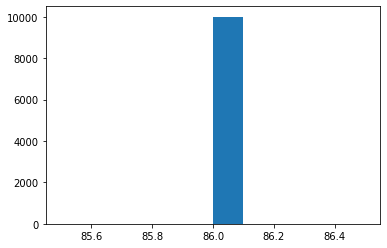

In [3]:
len_list = []
for key,values in doc_name_list.items():
    len_list.append(len(values))
plt.hist(len_list)

In [4]:
for i in range(0,86):
    with open("../datasets/subjectivity/{}.txt".format(i), 'w') as file:
        for k,v in doc_name_list.items():
            file.writelines("{}\n".format(v[i]))
    print("=> Processed: ",i)    

=> Processed:  0
=> Processed:  1
=> Processed:  2
=> Processed:  3
=> Processed:  4
=> Processed:  5
=> Processed:  6
=> Processed:  7
=> Processed:  8
=> Processed:  9
=> Processed:  10
=> Processed:  11
=> Processed:  12
=> Processed:  13
=> Processed:  14
=> Processed:  15
=> Processed:  16
=> Processed:  17
=> Processed:  18
=> Processed:  19
=> Processed:  20
=> Processed:  21
=> Processed:  22
=> Processed:  23
=> Processed:  24
=> Processed:  25
=> Processed:  26
=> Processed:  27
=> Processed:  28
=> Processed:  29
=> Processed:  30
=> Processed:  31
=> Processed:  32
=> Processed:  33
=> Processed:  34
=> Processed:  35
=> Processed:  36
=> Processed:  37
=> Processed:  38
=> Processed:  39
=> Processed:  40
=> Processed:  41
=> Processed:  42
=> Processed:  43
=> Processed:  44
=> Processed:  45
=> Processed:  46
=> Processed:  47
=> Processed:  48
=> Processed:  49
=> Processed:  50
=> Processed:  51
=> Processed:  52
=> Processed:  53
=> Processed:  54
=> Processed:  55
=>

Text(0.5, 1.0, 'Unique Items')

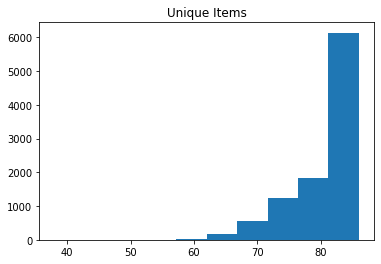

In [5]:
unique_list = []
str_len = []
for key,values in doc_name_list.items():
    unique_list.append(len(list(set(values))))
    str_len.append(len(values[0].split("\t")[1]))
plt.hist(unique_list)
plt.title("Unique Items")

Text(0.5, 1.0, 'String Length')

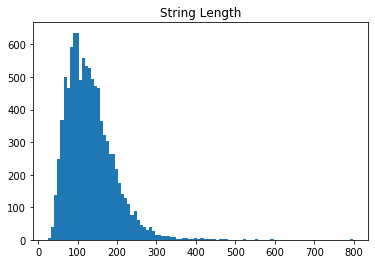

In [6]:
plt.hist(str_len,bins=100);
plt.title("String Length")

Text(0.5, 1.0, 'Length vs. Unique')

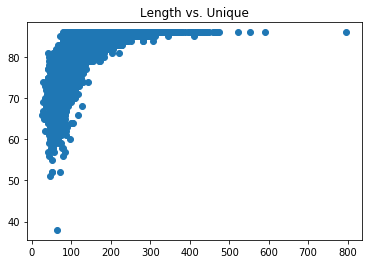

In [7]:
plt.scatter(str_len,unique_list)
plt.title("Length vs. Unique")

In [8]:
for key,values in doc_name_list.items():
    new_vals = list(set(values))
    if len(new_vals) < 30:
        print("SKIPPING: ",key)
    else:
        doc_name_list[key] = new_vals

In [21]:
skip_key = np.nan
for key,values in doc_name_list.items():
    new_vals = list(set(values))
    if len(new_vals) < 40:
        print("SKIPPING: ",key)
        skip_key = key
    else:
        doc_name_list[key] = new_vals
doc_name_list.pop(skip_key);

SKIPPING:  9786


In [22]:
#get minimum augmented sample number. 
min_sample = min([len(i)for i in doc_name_list.values()])
print("Minimum Unique Samples: ",min_sample)

Minimum Unique Samples:  51


In [23]:
for i in range(0,min_sample):
    with open("../datasets/subjectivity/unique/{}.txt".format(i), 'w') as file:
        for k,v in doc_name_list.items():
            file.writelines("{}\n".format(v[i]))
    print("=> Processed: ",i)    

=> Processed:  0
=> Processed:  1
=> Processed:  2
=> Processed:  3
=> Processed:  4
=> Processed:  5
=> Processed:  6
=> Processed:  7
=> Processed:  8
=> Processed:  9
=> Processed:  10
=> Processed:  11
=> Processed:  12
=> Processed:  13
=> Processed:  14
=> Processed:  15
=> Processed:  16
=> Processed:  17
=> Processed:  18
=> Processed:  19
=> Processed:  20
=> Processed:  21
=> Processed:  22
=> Processed:  23
=> Processed:  24
=> Processed:  25
=> Processed:  26
=> Processed:  27
=> Processed:  28
=> Processed:  29
=> Processed:  30
=> Processed:  31
=> Processed:  32
=> Processed:  33
=> Processed:  34
=> Processed:  35
=> Processed:  36
=> Processed:  37
=> Processed:  38
=> Processed:  39
=> Processed:  40
=> Processed:  41
=> Processed:  42
=> Processed:  43
=> Processed:  44
=> Processed:  45
=> Processed:  46
=> Processed:  47
=> Processed:  48
=> Processed:  49
=> Processed:  50


In [24]:
with open("../datasets/subjectivity/unique/consolidated.txt", 'w') as file:
    for k,v in doc_name_list.items():
        for i in range(0,min_sample):
            file.writelines("{}\n".format(v[i]))

In [ ]:
!head -n41 ../datasets/subjectivity/unique/consolidated.txt

In [ ]:
! head -n10 ../datasets/subjectivity/unique/consolidated.txt

In [ ]:
!head -n5 ../datasets/subjectivity.txt